In [41]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [42]:
df_train = pd.read_csv("Creditcard_data.csv")
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
df_train.shape

(772, 31)

In [73]:
X = df_train.drop(['Class'],axis=1)
y = df_train['Class']


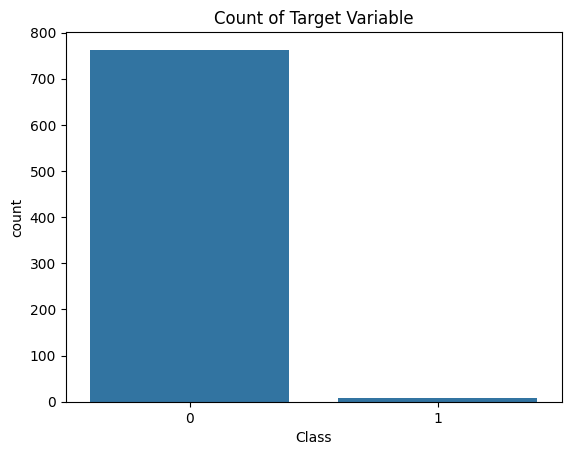

In [45]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(x='Class', data=df_train)
plt.title('Count of Target Variable')
plt.show()

In [74]:
class_count_0, class_count_1 = df_train['Class'].value_counts()
# for class_value, count in class_counts.items():
#     print(f"{class_value}: {count}")
class_0 = df_train[df_train['Class']==0]
class_1 = df_train[df_train['Class']==1]
print('class 0 : ',class_0.shape)
print('class 1 : ',class_1.shape)

class 0 :  (763, 31)
class 1 :  (9, 31)


In [85]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_resampled))

Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, random_state=42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(1373, 30)
(153, 30)


In [91]:
print(y_test.value_counts())

Class
1    81
0    72
Name: count, dtype: int64


# **Sample Size Calculation**

In [94]:
import math
confidence_level = 0.95  
margin_of_error = 0.05  
Z = 1.96
p = 0.5  
# Calculate sample size
sample_size = math.ceil((Z**2 * p * (1 - p)) / (margin_of_error**2))

print(f"Required Sample Size: {sample_size}")


Required Sample Size: 385


# **Creating Sample**

In [116]:
def sampler():
    # Convert the resampled data back to a DataFrame
    df_resampled = pd.DataFrame(X_train, columns=X_resampled.columns)
    df_resampled['Class'] = y_train

    # Create a random sample from the oversampled data
    random_sample_size = sample_size 
    random_sample = df_resampled.sample(n=random_sample_size)

    # Display the distribution of classes in the random sample
    #print(random_sample['Class'].value_counts())
    return random_sample


# Importing the libraries

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Calculating Accuracy

In [122]:
from sklearn.metrics import accuracy_score
max_score = 0
for i in range(0,5):
    random_sample = sampler()
    X_sample = random_sample.drop(['Class'],axis=1)
    y_sample = random_sample['Class']
    #print(f"Sample {i}: y_sample shape: {y_sample.shape}, y_test shape: {y_test.shape}")
    models = {
        RandomForestClassifier(random_state=42),
        DecisionTreeClassifier(random_state=42),
        #XGBClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        KNeighborsClassifier(),
        svm.SVC(random_state=42)
        #LinearRegression()
    }
    for model in models:
        model.fit(X_sample,y_sample)
        y_pred = model.predict(X_test)
        #print(f"Model: {model}, y_pred shape: {y_pred.shape}, y_test shape: {y_test.shape}")
        accuracy = accuracy_score(y_test, y_pred)
        if max_score<=accuracy:
            samp = i
            max_score = accuracy
            final_model = model
        print(f"Sample:{i}, Model: {model}, accuracy: {accuracy}")


Sample:0, Model: SVC(random_state=42), accuracy: 0.6143790849673203
Sample:0, Model: KNeighborsClassifier(), accuracy: 0.9673202614379085
Sample:0, Model: DecisionTreeClassifier(random_state=42), accuracy: 0.9738562091503268
Sample:0, Model: RandomForestClassifier(random_state=42), accuracy: 0.9934640522875817
Sample:0, Model: GradientBoostingClassifier(random_state=42), accuracy: 0.9803921568627451
Sample:1, Model: KNeighborsClassifier(), accuracy: 0.934640522875817
Sample:1, Model: SVC(random_state=42), accuracy: 0.6209150326797386
Sample:1, Model: DecisionTreeClassifier(random_state=42), accuracy: 0.9803921568627451
Sample:1, Model: RandomForestClassifier(random_state=42), accuracy: 1.0
Sample:1, Model: GradientBoostingClassifier(random_state=42), accuracy: 0.9934640522875817
Sample:2, Model: SVC(random_state=42), accuracy: 0.6601307189542484
Sample:2, Model: DecisionTreeClassifier(random_state=42), accuracy: 0.9673202614379085
Sample:2, Model: KNeighborsClassifier(), accuracy: 0.94

In [123]:
print(f"Best Sample no:{samp} model: {final_model} with accuracy = {max_score}")

Best Sample no:3 model: RandomForestClassifier(random_state=42) with accuracy = 1.0
